# ChatBot personalizado: Introducción al servicio de Azure Open AI

En esta sección del notebook hablaremos sobre como crear un ChatBot personalizado utilizando el servicio cognitivo de Azure OpenAI.


**Diagrama de la implementación**:

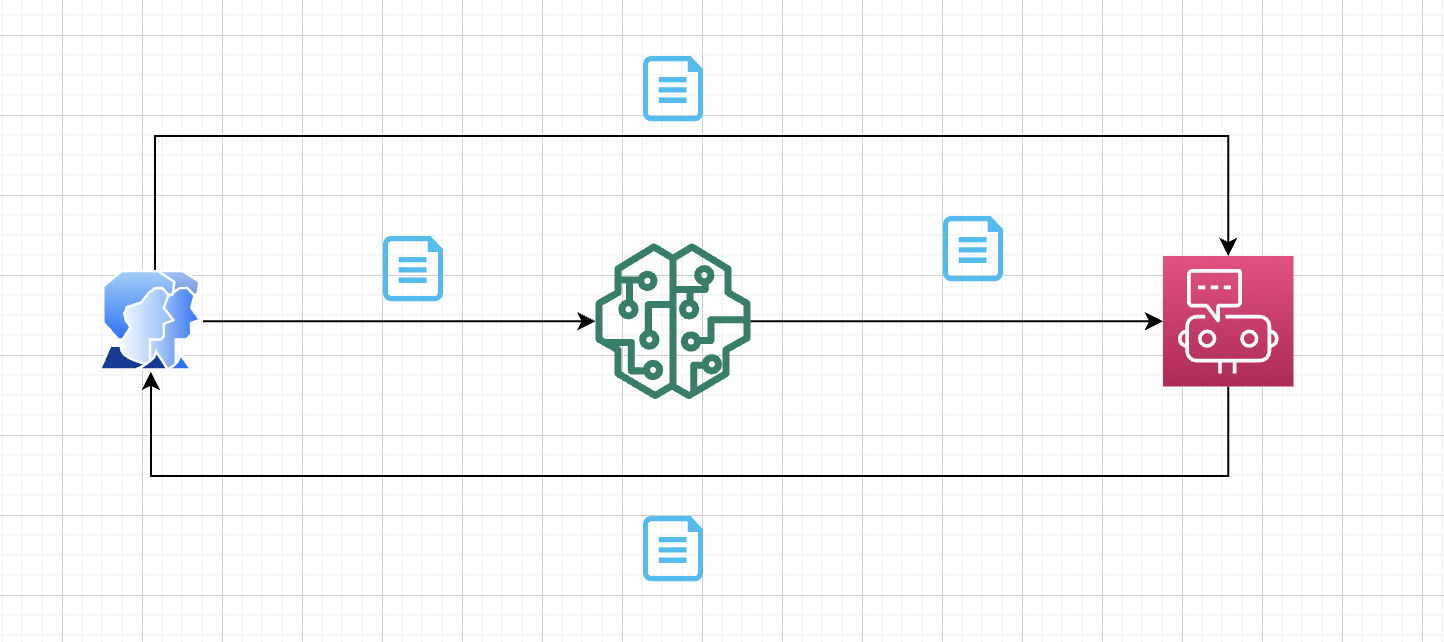

A continuación se muestra el paso a paso para construir un bot conversacional utilizando pocas líneas de código:

### Paso 1: Instalación de librerías


* La librería de OpenAI se utiliza para interactuar con los LLMs disponibles en Azure OpenAI (Está librería es compartida entre Azure y Openai)

In [ ]:
#! pip install openai

### Paso 2: Importar la librería de openai

In [ ]:
#! pip install openai --upgrade

In [ ]:
import openai

### Paso 3: Configuración de llamada al servicio   
En este paso se configura el tipo de llamada que se hará. En este caso tomaremos ventaja del servicio de Azure OpenAI, por lo tanto el api_type es "azure", el endpoint y el api key se obtienen a través del Portal de Azure. Para generar un endpoint, es necesario crear un recurso de OpenAI en el portal de Azure y después crear un deployment.
Para mayor información:
https://learn.microsoft.com/en-us/azure/cognitive-services/openai/how-to/create-resource?pivots=web-*portal*


In [ ]:
openai.api_type = "azure"
openai.api_base = "https://openaidemos.openai.azure.com/"
openai.api_version = "2023-03-15-preview"
openai.api_key = "0dc26b3766c141bc8b2f4ac6c7f88ce2"

### Diferencia con OpenAI?

In [ ]:
# openai.api_key  = 'your-key'

### Paso 4: Aprendiendo a utilizar ChatCompletions
 A continuación se muestra una llamada sencilla al servidor de Azure OpenAI

Completion vs ChatCompletion - Die¡ferencias?

In [ ]:
model_engine = "Test"
messages = [
      {"role": "system", "content": "Eres el customer service bot de BBVA Bancomer. Tú nombre es BancoBot y te dedicas a dar consejos financieros."},
      {"role": "user", "content": 'Cómo puedo mejorar mis finanzas?'},
      ]

response = openai.ChatCompletion.create(
      engine=model_engine,
      messages=messages,
      max_tokens=300,
      temperature=0.9
      )
print(response)

* Obteniendo la respuesta a la pregunta

In [ ]:
answer = response.choices[0]['message']['content']
print(answer)

### Paso 5: Desarrollando el bot
Ahora que sabemos las bases de cómo interactuar con el servicio de Azure OpenAI, podemos comenzar a diseñar nuestro bot conversacional.

### Llamando al bot

In [ ]:
def ask_gpt(question):
    
    model_engine = "Test"
    messages = [
      {"role": "system", "content": "Eres el customer service bot de BBVA Bancomer. Tú nombre es BancoBot y te dedicas a resolver dudas relacionadas con los productos que ofrece BBVA Bancomer. Responde en base a tu contexto"},
      {"role": "system", "content": """
                Cuentas de Débito BBVA Bancomer
                
                BBVA Bancomer ofrece cuentas de débito para sus usuarios. Los usuarios pueden escojer entre:
                - Cuenta de debito con chequera
                - y Cuenta de debito sin chequera.

                La principal diferencia entre una cuenta de débito con chequera y sin chequera es que la cuenta con chequera te permite emitir cheques para realizar pagos, mientras que la cuenta sin chequera no tiene esta opción.
                Una cuenta de débito con chequera es una cuenta bancaria que te permite realizar pagos mediante la emisión de cheques. Cuando tienes una cuenta de cheques, el banco te proporciona un talonario de cheques que puedes utilizar para pagar a proveedores, realizar transferencias a otras cuentas, pagar facturas, entre otras transacciones. Para realizar un pago, simplemente debes llenar el cheque con la cantidad y el beneficiario, y luego entregarlo al destinatario.
                Por otro lado, una cuenta de débito sin chequera es una cuenta bancaria que te permite realizar pagos mediante una tarjeta de débito. Con una cuenta sin chequera, puedes realizar pagos en línea, en tiendas y cajeros automáticos utilizando la tarjeta de débito que te proporciona el banco. Además, también puedes realizar transferencias electrónicas desde tu cuenta a otras cuentas.
                En resumen, la principal diferencia entre una cuenta de débito con chequera y sin chequera es que la primera te permite emitir cheques para realizar pagos, mientras que la segunda no. La elección de una cuenta de cheques o sin cheques dependerá de tus necesidades y preferencias personales en cuanto a la forma de realizar pagos y transacciones bancarias.

                Dentro de las cuentas con chequera, BBVA Bancomer ofrece las siguientes opciones:
                - Libretón Premium
                    - Vincula tus créditos, inversiones, seguros, préstamos o nóminas y disfruta de los beneficios
                    - Consulta tu saldo sin costo en bbva.mx y la app BBVA México
                    - Compra de forma segura en miles de comercios de México y el mundo
                - Libretón Dólares
                    - Una cuenta en dólares para ti, que vives en la frontera norte de México
                    - Compra y paga con tu tarjeta de débito internacional
                    - Úsala desde Bancomer Móvil y bbva.mx
                - Libretón 2.0
                    - Este producto no se encuentra disponible para nuevas contrataciones.
                    - La información es solo para consulta de clientes que ya tengan contratado su Libretón 2.0.
                - Maestra dólares frontera
                    - Este producto no se encuentra disponible para nuevas contrataciones.
                    - La información es solo para consulta de clientes que ya tengan contratada su Maestra Dólares Frontera.
                - Maestra particulares
                    - Este producto no se encuentra disponible para nuevas contrataciones.
                    - La información es solo para consulta de clientes que ya tengan contratada su Maestra Particulares.
                - Membresía BP
                    - Tiene a su disposición la tarjeta de Débito VIP y Visa Internacional.
                    - Las consultas y retiros en cajeros automáticos BBVA son sin costo. 
                    - Cuota por Membresía $50 pesos al mes.
                - Maestra Patrimonial Dólares sin Frontera
                    - Puede girar hasta 10 cheques mensualmente, sin costo
                    - Cuenta con más de 1,600 sucursales en todo el país
                    - Disponibilidad inmediata de su dinero en depósito a cuenta o pago de cheques

                Dentro de las cuentas sin chequera, BBVA Bancomer ofrece las siguientes opciones:
                - Link Card: 
                    - Permite que los niños y jóvenes se acerquen al mundo financiero con estos beneficios:
                        - sin comisión por apertura, manejo de cuenta ni saldo mínimo
                        - tu tarjeta puede ser personalizada
                        - puedes comprar en miles de comercios o por internet
                - Libretón Básico:
                    - La cuenta segura y accesible para administrar tu dinero
                    - Realiza transferencias o pagos desde tu celular con la app BBVA México
                    - Consulta tu saldo en la app BBVA México y bbva.mx sin costo
                - Tarjeta de viajes:
                    - ¿Estás planeando un viaje? Tenemos la tarjeta para ti:
                        - recárgala en línea y en sucursales
                        - el monto mínimo de apertura es de $10.00 dólares
                - Winner card:
                    - ¿Tienes menos de 18 años? ¡Esta es la tarjeta para ti!
                        - Firma tus compras en miles de tiendas y comercios
                        - Realiza compras y pagos desde tu celular o computadora
                - Tarjeta Básica:
                    - La cuenta básica para administrar tus ingresos, compras y pagos.
                    - Sin monto de apertura
                    - Sin saldo mínimo
                - Tarjeta Nómina Básica:
                    - La cuenta básica para administrar tus ingresos, compras y pagos.
                    - Sin monto mínimo de apertura
                    - Sin saldo mínimo
                - Cuenta Express:
                    - Este producto no se encuentra disponible para nuevas contrataciones.
                    - La información es solo para consulta de clientes que ya tengan contratada su Cuenta Express.
                - Libretón BBVA Bancomer:
                    - Este producto no se encuentra disponible para nuevas contrataciones.
                    - La información es solo para consulta de clientes que ya tengan contratado su Libretón.
                - Libretón Dólares Frontera:
                    - Este producto no se encuentra disponible para nuevas contrataciones.
                    - La información es solo para consulta de clientes que ya tengan contratado su Libretón Dólares Frontera."""},
      {"role": "user", "content": f'Responde lo siguiente: {question}'},
      ]
    
    response = openai.ChatCompletion.create(
      engine=model_engine,
      messages=messages,
      max_tokens=600,
      temperature=0.9
      )
    
    message = response.choices[0]['message']['content']
    
    return (message, response["usage"])

In [ ]:
answer, usage = ask_gpt("¿que cuentas de débito tienes?")
print(answer)

In [ ]:
print(usage)

### Primeras interacciones con el bot

In [ ]:
while True:
    user_input = input()  
    answer = ask_gpt(user_input)
    print(f"Bot: {answer}")

mmmm 🤔! El bot no está manteniendo el flujo de la conversación. Cómo solucionarlo: Debemos pasarle el historial de la conversación


### Cómo mantener el historial de la conversación?

In [ ]:
def get_history(previous_questions: list, previous_answers: list) -> str:
    """
    Obtiene el historial de la conversación.
    """
    history = []
    for (question, response) in zip(previous_questions, previous_answers):
        quest = {"role": "user", "content": f'{question}'}
        ans = {"role": "assistant", "content": f'{response}'}
        history.append(quest)
        history.append(ans)
    return history

In [ ]:
usuario = ["Hola", "Me gustaría saber sobre los productos que tienes"]
bot = ["Hola, soy tú asistente virtual", "Claro, tenemos los siguientes productos: \n1.- Shampoo \n2.- Jabon\n3.-Queso\n4.-jamon"]

In [ ]:
historial = get_history(usuario, bot)
print(historial)

### Itegrando el historial a la llamada:

In [ ]:
def ask_gpt(question, history):
    
    quest=  {"role": "user", "content": f'{question}'}
    model_engine = "gpt-35-turbo"
    messages = [
      {"role": "system", "content": "Eres el customer service bot de BBVA Bancomer. Tú nombre es BancoBot y te dedicas a resolver dudas relacionadas con los productos que ofrece BBVA Bancomer. Responde en base a tu contexto"},
      {"role": "system", "content": """
                Cuentas de Débito BBVA Bancomer
                
                BBVA Bancomer ofrece cuentas de débito para sus usuarios. Los usuarios pueden escojer entre:
                - Cuenta de debito con chequera
                - y Cuenta de debito sin chequera.

                La principal diferencia entre una cuenta de débito con chequera y sin chequera es que la cuenta con chequera te permite emitir cheques para realizar pagos, mientras que la cuenta sin chequera no tiene esta opción.
                Una cuenta de débito con chequera es una cuenta bancaria que te permite realizar pagos mediante la emisión de cheques. Cuando tienes una cuenta de cheques, el banco te proporciona un talonario de cheques que puedes utilizar para pagar a proveedores, realizar transferencias a otras cuentas, pagar facturas, entre otras transacciones. Para realizar un pago, simplemente debes llenar el cheque con la cantidad y el beneficiario, y luego entregarlo al destinatario.
                Por otro lado, una cuenta de débito sin chequera es una cuenta bancaria que te permite realizar pagos mediante una tarjeta de débito. Con una cuenta sin chequera, puedes realizar pagos en línea, en tiendas y cajeros automáticos utilizando la tarjeta de débito que te proporciona el banco. Además, también puedes realizar transferencias electrónicas desde tu cuenta a otras cuentas.
                En resumen, la principal diferencia entre una cuenta de débito con chequera y sin chequera es que la primera te permite emitir cheques para realizar pagos, mientras que la segunda no. La elección de una cuenta de cheques o sin cheques dependerá de tus necesidades y preferencias personales en cuanto a la forma de realizar pagos y transacciones bancarias.

                Dentro de las cuentas con chequera, BBVA Bancomer ofrece las siguientes opciones:
                - Libretón Premium
                    - Vincula tus créditos, inversiones, seguros, préstamos o nóminas y disfruta de los beneficios
                    - Consulta tu saldo sin costo en bbva.mx y la app BBVA México
                    - Compra de forma segura en miles de comercios de México y el mundo
                - Libretón Dólares
                    - Una cuenta en dólares para ti, que vives en la frontera norte de México
                    - Compra y paga con tu tarjeta de débito internacional
                    - Úsala desde Bancomer Móvil y bbva.mx
                - Libretón 2.0
                    - Este producto no se encuentra disponible para nuevas contrataciones.
                    - La información es solo para consulta de clientes que ya tengan contratado su Libretón 2.0.
                - Maestra dólares frontera
                    - Este producto no se encuentra disponible para nuevas contrataciones.
                    - La información es solo para consulta de clientes que ya tengan contratada su Maestra Dólares Frontera.
                - Maestra particulares
                    - Este producto no se encuentra disponible para nuevas contrataciones.
                    - La información es solo para consulta de clientes que ya tengan contratada su Maestra Particulares.
                - Membresía BP
                    - Tiene a su disposición la tarjeta de Débito VIP y Visa Internacional.
                    - Las consultas y retiros en cajeros automáticos BBVA son sin costo. 
                    - Cuota por Membresía $50 pesos al mes.
                - Maestra Patrimonial Dólares sin Frontera
                    - Puede girar hasta 10 cheques mensualmente, sin costo
                    - Cuenta con más de 1,600 sucursales en todo el país
                    - Disponibilidad inmediata de su dinero en depósito a cuenta o pago de cheques

                Dentro de las cuentas sin chequera, BBVA Bancomer ofrece las siguientes opciones:
                - Link Card: 
                    - Permite que los niños y jóvenes se acerquen al mundo financiero con estos beneficios:
                        - sin comisión por apertura, manejo de cuenta ni saldo mínimo
                        - tu tarjeta puede ser personalizada
                        - puedes comprar en miles de comercios o por internet
                - Libretón Básico:
                    - La cuenta segura y accesible para administrar tu dinero
                    - Realiza transferencias o pagos desde tu celular con la app BBVA México
                    - Consulta tu saldo en la app BBVA México y bbva.mx sin costo
                - Tarjeta de viajes:
                    - ¿Estás planeando un viaje? Tenemos la tarjeta para ti:
                        - recárgala en línea y en sucursales
                        - el monto mínimo de apertura es de $10.00 dólares
                - Winner card:
                    - ¿Tienes menos de 18 años? ¡Esta es la tarjeta para ti!
                        - Firma tus compras en miles de tiendas y comercios
                        - Realiza compras y pagos desde tu celular o computadora
                - Tarjeta Básica:
                    - La cuenta básica para administrar tus ingresos, compras y pagos.
                    - Sin monto de apertura
                    - Sin saldo mínimo
                - Tarjeta Nómina Básica:
                    - La cuenta básica para administrar tus ingresos, compras y pagos.
                    - Sin monto mínimo de apertura
                    - Sin saldo mínimo
                - Cuenta Express:
                    - Este producto no se encuentra disponible para nuevas contrataciones.
                    - La información es solo para consulta de clientes que ya tengan contratada su Cuenta Express.
                - Libretón BBVA Bancomer:
                    - Este producto no se encuentra disponible para nuevas contrataciones.
                    - La información es solo para consulta de clientes que ya tengan contratado su Libretón.
                - Libretón Dólares Frontera:
                    - Este producto no se encuentra disponible para nuevas contrataciones.
                    - La información es solo para consulta de clientes que ya tengan contratado su Libretón Dólares Frontera."""},
      ]
 
    prompt = messages + history
    prompt.append(quest)

    response = openai.ChatCompletion.create(
      engine=model_engine,
      messages=prompt,
      max_tokens=600,
      temperature=0.9
      )

    message = response.choices[0]['message']['content']

    return (message, response["usage"])

#### Verificando que el bot sigue el flujo conversacional

In [ ]:
previous_questions = []
previous_answers = []

while True:
    user_input = input()
    history = get_history(previous_questions, previous_answers)
    answer = ask_gpt(user_input, history)
    print(f"Bot: {answer}")
    previous_questions.append(user_input)
    previous_answers.append(answer)

### Stremeando la respuesta

In [ ]:
def ask_gpt(question, history):

    quest=  {"role": "user", "content": f'{question}'}

    model_engine = "gpt-35-turbo"
    
    messages = [
      {"role": "system", "content": "Eres el customer service bot de BBVA Bancomer. Tú nombre es BancoBot y te dedicas a resolver dudas relacionadas con los productos que ofrece BBVA Bancomer. Responde en base a tu contexto"},
      {"role": "system", "content": """
                Cuentas de Débito BBVA Bancomer
                
                BBVA Bancomer ofrece cuentas de débito para sus usuarios. Los usuarios pueden escojer entre:
                - Cuenta de debito con chequera
                - y Cuenta de debito sin chequera.

                La principal diferencia entre una cuenta de débito con chequera y sin chequera es que la cuenta con chequera te permite emitir cheques para realizar pagos, mientras que la cuenta sin chequera no tiene esta opción.
                Una cuenta de débito con chequera es una cuenta bancaria que te permite realizar pagos mediante la emisión de cheques. Cuando tienes una cuenta de cheques, el banco te proporciona un talonario de cheques que puedes utilizar para pagar a proveedores, realizar transferencias a otras cuentas, pagar facturas, entre otras transacciones. Para realizar un pago, simplemente debes llenar el cheque con la cantidad y el beneficiario, y luego entregarlo al destinatario.
                Por otro lado, una cuenta de débito sin chequera es una cuenta bancaria que te permite realizar pagos mediante una tarjeta de débito. Con una cuenta sin chequera, puedes realizar pagos en línea, en tiendas y cajeros automáticos utilizando la tarjeta de débito que te proporciona el banco. Además, también puedes realizar transferencias electrónicas desde tu cuenta a otras cuentas.
                En resumen, la principal diferencia entre una cuenta de débito con chequera y sin chequera es que la primera te permite emitir cheques para realizar pagos, mientras que la segunda no. La elección de una cuenta de cheques o sin cheques dependerá de tus necesidades y preferencias personales en cuanto a la forma de realizar pagos y transacciones bancarias.

                Dentro de las cuentas con chequera, BBVA Bancomer ofrece las siguientes opciones:
                - Libretón Premium
                    - Vincula tus créditos, inversiones, seguros, préstamos o nóminas y disfruta de los beneficios
                    - Consulta tu saldo sin costo en bbva.mx y la app BBVA México
                    - Compra de forma segura en miles de comercios de México y el mundo
                - Libretón Dólares
                    - Una cuenta en dólares para ti, que vives en la frontera norte de México
                    - Compra y paga con tu tarjeta de débito internacional
                    - Úsala desde Bancomer Móvil y bbva.mx
                - Libretón 2.0
                    - Este producto no se encuentra disponible para nuevas contrataciones.
                    - La información es solo para consulta de clientes que ya tengan contratado su Libretón 2.0.
                - Maestra dólares frontera
                    - Este producto no se encuentra disponible para nuevas contrataciones.
                    - La información es solo para consulta de clientes que ya tengan contratada su Maestra Dólares Frontera.
                - Maestra particulares
                    - Este producto no se encuentra disponible para nuevas contrataciones.
                    - La información es solo para consulta de clientes que ya tengan contratada su Maestra Particulares.
                - Membresía BP
                    - Tiene a su disposición la tarjeta de Débito VIP y Visa Internacional.
                    - Las consultas y retiros en cajeros automáticos BBVA son sin costo. 
                    - Cuota por Membresía $50 pesos al mes.
                - Maestra Patrimonial Dólares sin Frontera
                    - Puede girar hasta 10 cheques mensualmente, sin costo
                    - Cuenta con más de 1,600 sucursales en todo el país
                    - Disponibilidad inmediata de su dinero en depósito a cuenta o pago de cheques

                Dentro de las cuentas sin chequera, BBVA Bancomer ofrece las siguientes opciones:
                - Link Card: 
                    - Permite que los niños y jóvenes se acerquen al mundo financiero con estos beneficios:
                        - sin comisión por apertura, manejo de cuenta ni saldo mínimo
                        - tu tarjeta puede ser personalizada
                        - puedes comprar en miles de comercios o por internet
                - Libretón Básico:
                    - La cuenta segura y accesible para administrar tu dinero
                    - Realiza transferencias o pagos desde tu celular con la app BBVA México
                    - Consulta tu saldo en la app BBVA México y bbva.mx sin costo
                - Tarjeta de viajes:
                    - ¿Estás planeando un viaje? Tenemos la tarjeta para ti:
                        - recárgala en línea y en sucursales
                        - el monto mínimo de apertura es de $10.00 dólares
                - Winner card:
                    - ¿Tienes menos de 18 años? ¡Esta es la tarjeta para ti!
                        - Firma tus compras en miles de tiendas y comercios
                        - Realiza compras y pagos desde tu celular o computadora
                - Tarjeta Básica:
                    - La cuenta básica para administrar tus ingresos, compras y pagos.
                    - Sin monto de apertura
                    - Sin saldo mínimo
                - Tarjeta Nómina Básica:
                    - La cuenta básica para administrar tus ingresos, compras y pagos.
                    - Sin monto mínimo de apertura
                    - Sin saldo mínimo
                - Cuenta Express:
                    - Este producto no se encuentra disponible para nuevas contrataciones.
                    - La información es solo para consulta de clientes que ya tengan contratada su Cuenta Express.
                - Libretón BBVA Bancomer:
                    - Este producto no se encuentra disponible para nuevas contrataciones.
                    - La información es solo para consulta de clientes que ya tengan contratado su Libretón.
                - Libretón Dólares Frontera:
                    - Este producto no se encuentra disponible para nuevas contrataciones.
                    - La información es solo para consulta de clientes que ya tengan contratado su Libretón Dólares Frontera."""},
      ]
 
    prompt = messages + history
    prompt.append(quest)

    response = openai.ChatCompletion.create(
      engine=model_engine,
      messages=prompt,
      max_tokens=600,
      temperature=0.9,
      stream=True
      )
    answer = ''
    full_response = ''

    for event in response: 
        print(answer, end='', flush=True)
        event_text = event['choices'][0]['delta']
        answer = event_text.get('content', '')
        full_response += answer

    return full_response

In [ ]:
response = ask_gpt("Que cuentas de debito tienes?", [])

In [ ]:
print(response)

### Integrando streaming a nuestro bot

In [ ]:
previous_questions = []
previous_answers = []

while True:
    user_input = input()
    history = get_history(previous_questions, previous_answers)
    answer = ask_gpt(user_input, history)
    previous_questions.append(user_input)
    previous_answers.append(answer)

## ¿Qué pasa si tenemos contextos que exceden el número de tokens que puedo mandar en un request?

### Límite de tokens en los requests:


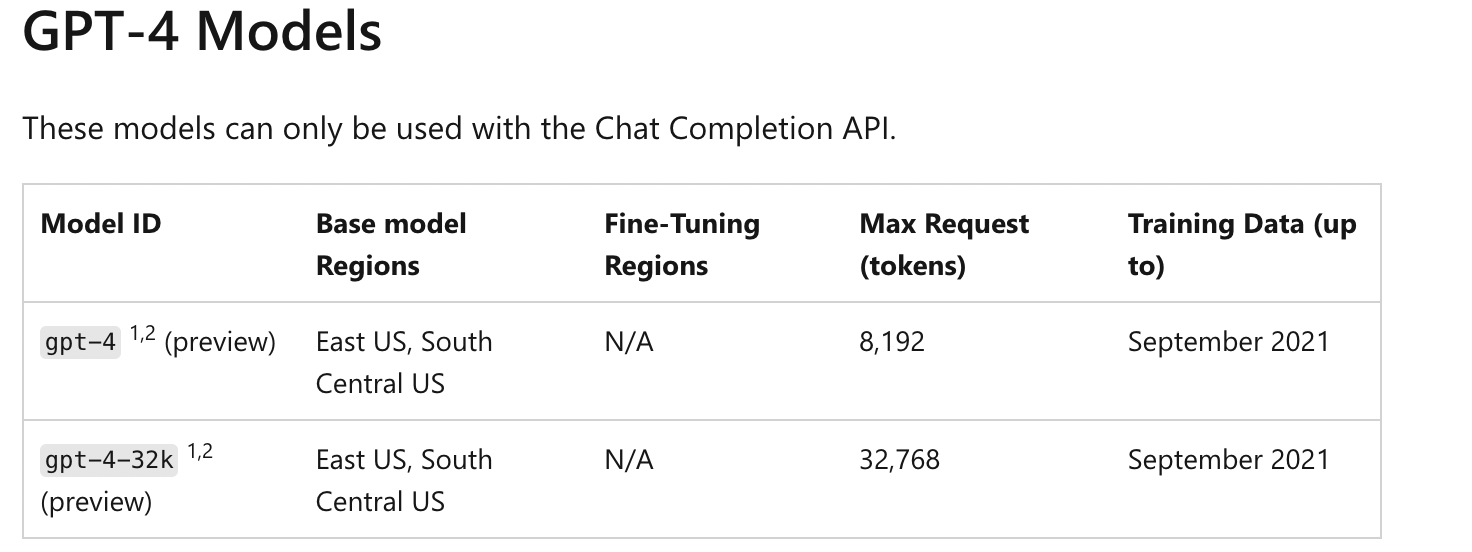



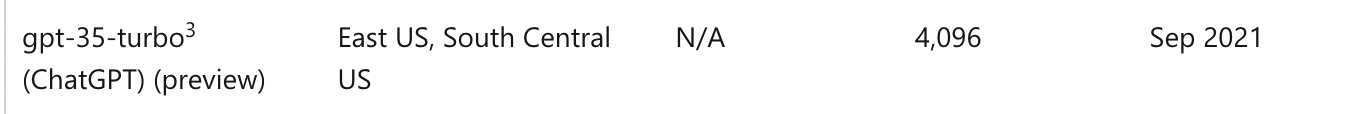

### Búsqueda Semántica

Para está sesión utilizaremos la búsqueda semántica.
La busqueda semática que implementaremos consiste en 2 pasos:

1.- Obtener embeddings: Los embeddings son una forma de representación de númerica del contenido semántico de pequeños fragmentos de texto dentro de documentos. Esta representación númerica de la data se conoce como vector semántico.


2.- Indexar los embebidos y almacenarlos dentro de un vectorstore. 

## Chat personalizado con búsqueda semántica.

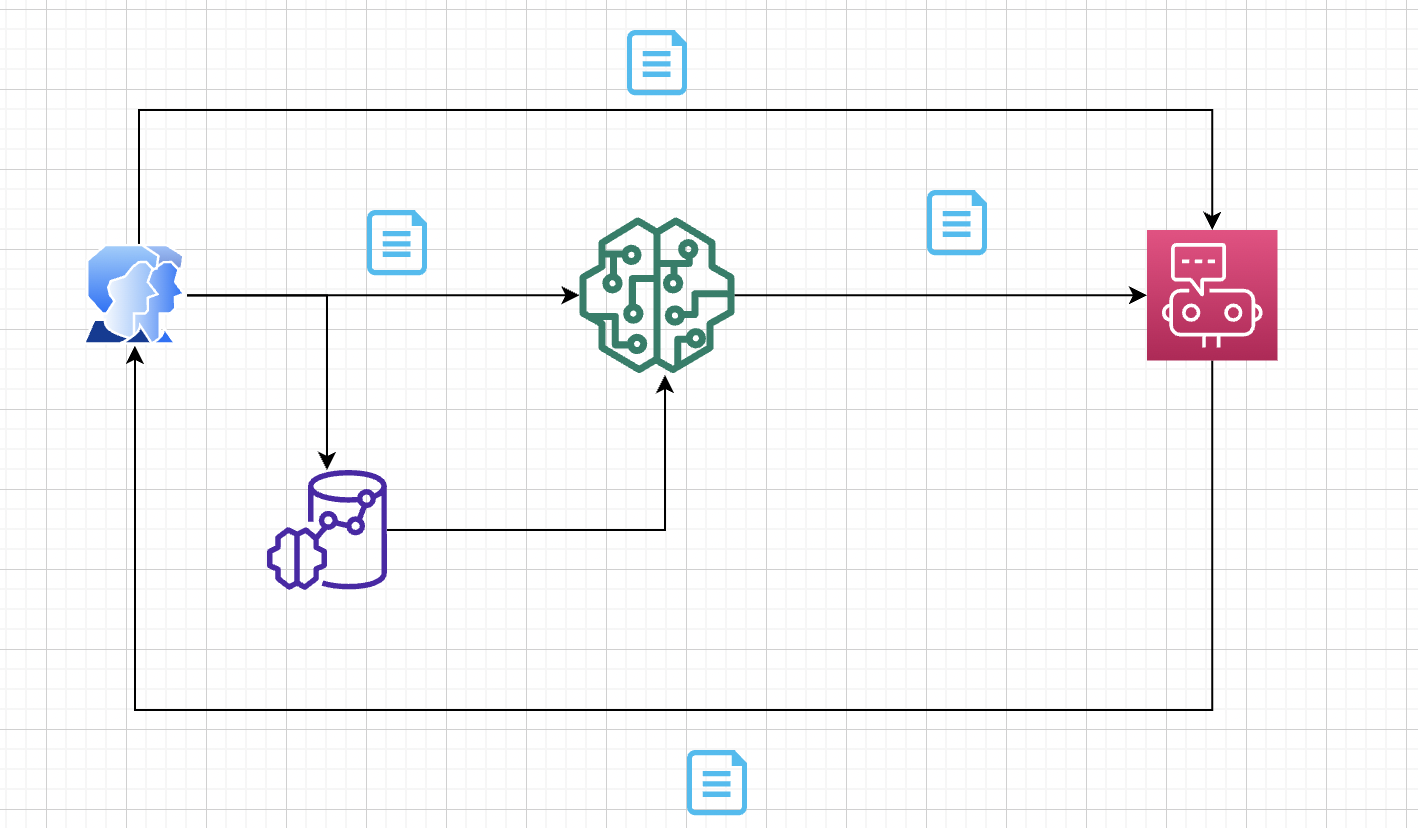

### Paso 1: Instalar las librerías requeridas

In [ ]:
# ! pip install langchain faiss-cpu unstructured

### Paso 2: Creando un almacenador de vectores semánticos

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import UnstructuredFileLoader, DirectoryLoader
from langchain.vectorstores.faiss import FAISS
from langchain.embeddings import OpenAIEmbeddings
import pickle
import os

In [ ]:
import openai
openai.api_base = "your-endpoint" 
openai.api_type = 'azure'
openai.api_version = "2022-12-01" 

In [ ]:
os.environ['OPENAI_API_KEY'] = 'your-key'

In [ ]:
def embed_doc(directory_path):
    loader = DirectoryLoader(directory_path, glob="**/*.*")
    raw_documents = loader.load()
    print(len(raw_documents))
    text_splitter = RecursiveCharacterTextSplitter(
      chunk_size = 1000,
      chunk_overlap = 0,
      length_function = len,)
    documents = text_splitter.split_documents(raw_documents)
    embeddings = OpenAIEmbeddings(model='embeddings-ai-ada-v2', chunk_size=1)
    vectorstore = FAISS.from_documents(documents, embeddings)
    
    return vectorstore

In [ ]:
! pip list | grep langchain

In [ ]:
vectorstore = embed_doc("your-directory")

In [ ]:
def get_context(vectorstore, query):
  similar_docs = vectorstore.similarity_search(query, k=3)
  context = ("END ").join([similar_docs[i].page_content for i, doc in enumerate(similar_docs)])
  context_fmt = f"""
  Contexto
  ===============================================
  {context}
  ===============================================
  """
  return context_fmt

In [ ]:
context = get_context(vectorstore, "que es bbva seguros?")
print(context)

### Paso 3: Modificando la llamada a GPT para recibir el contexto

In [ ]:
def ask_gpt(question, history, context):

    quest=  {"role": "user", "content": f'{question}'}

    model_engine = "gpt-35-turbo"
    messages = [
      {"role": "system", "content": "Eres el customer service bot de BBVA Bancomer. Tú nombre es BancoBot y te dedicas a resolver dudas relacionadas con los productos que ofrece BBVA Bancomer. Responde en base a tu contexto"},
      {"role": "system", "content": f'{context}'}
      ]

    prompt = messages + history
    prompt.append(quest)

    response = openai.ChatCompletion.create(
      engine=model_engine,
      messages=prompt,
      max_tokens=600,
      temperature=0.9,
      stream=True
      )
    answer = ''
    full_response = ''

    for event in response: 
        print(answer, end='', flush=True)
        event_text = event['choices'][0]['delta']
        answer = event_text.get('content', '')
        full_response += answer

    return full_response

### Paso 4: Integar la búsqueda semántica y testear nuestro bot

In [ ]:
previous_questions = []
previous_answers = []

In [ ]:


vectorstore = embed_doc("your-directory")

In [ ]:
openai.api_type = "azure"
openai.api_base = "your-endpoint"
openai.api_version = "2023-03-15-preview"
openai.api_key = "your-key"

In [ ]:
while True:
    user_input = input()
    history = get_history(previous_questions, previous_answers)
    context = get_context(vectorstore, user_input)
    answer = ask_gpt(user_input, history, context)
    previous_questions.append(user_input)
    previous_answers.append(answer)

mmmm 🤔! Cada que se hace una nueva pregunta, primero se realiza la busquéda semántica y ese contexto se le pasa al bot. Antes de hacer la búsqueda semántica no estamos considerando el historial de la llamada.
Vamos a refinar la búsqueda.
Antes de hacerla hay que pasar la nueva pregunta al contexto anterior.

### Paso 5: Refinando la pregunta antes de hacer la búsqueda semántica

Vanmos a hacer una llamada a GPT antes de realizar la búsqueda semántica, para que parafraseé nuestra pregunta y la ponga en el contexto del historial de conversaciones.

* Creando un prompt de refinamiento

In [ ]:
def refine_question(new_question, history):
    model_engine = "gpt-35-turbo"

    messages = [
        {"role": "system", "content": "Eres un parafraseador de preguntas. Cuando la pregunta nueva por si sola carece de contexto la parafraseas para que sea entendible por si sola. Apoyate del historial de la conversación para darle sentido a la pregunta. Las últimas preguntas tienen mayor relevancia que las primeras."},
        {"role": "user", "content": '''Parafrasea la nueva pregunta: 'Me puedes dar info del 2?' so that is in the context of the conversacion history: 'Pregunta 1: "Hola"
                                      Respuesta 1: "Hola, soy tú asistente virtual"
                                      Pregunta 2: "Me gustaría saber sobre los productos que tienes"
                                      Respuesta 2: "Claro, tenemos los siguientes productos: 
                                      1.- Shampoo 
                                      2.- Jabon
                                      3.- Queso
                                      4.- Jamon"' 
        '''},
        {"role": "assistant", "content": "Me puedes dar información sobre el Jabon"},
        {"role": "user", "content": "¿Qué es Azure?"},
        {"role": "assistant", "content": "¿Qué es Microsof Azure?"},
        {"role": "user", "content": f"Parafrasea la nueva pregunta: '{new_question}'' para que se encuentre dentro del contexto del historial de la llamada: '{history}'"}
        ]

    response = openai.ChatCompletion.create(
        engine=model_engine,
        messages=messages,
        max_tokens=300,
        temperature=0.5
        )

    message = response.choices[0]['message']['content']
        
    return message


In [ ]:
previous_questions = []
previous_answers = []

In [ ]:

vectorstore = embed_doc("data")

In [ ]:
while True:
    user_input = input()
    history = get_history(previous_questions, previous_answers)
    if history:
        query = refine_question(user_input, history)
        print(f'Adjusted question: {query}')
        context = get_context(vectorstore, query)
        # print(context)
        answer = ask_gpt(user_input, history, context)
    else:
        context = get_context(vectorstore, user_input)
        answer = ask_gpt(user_input, history, context)

    previous_questions.append(user_input)
    previous_answers.append(answer)

In [ ]:
previous_questions = []
previous_answers = []

# Chatbot personalizado con speech to text y text to speech:
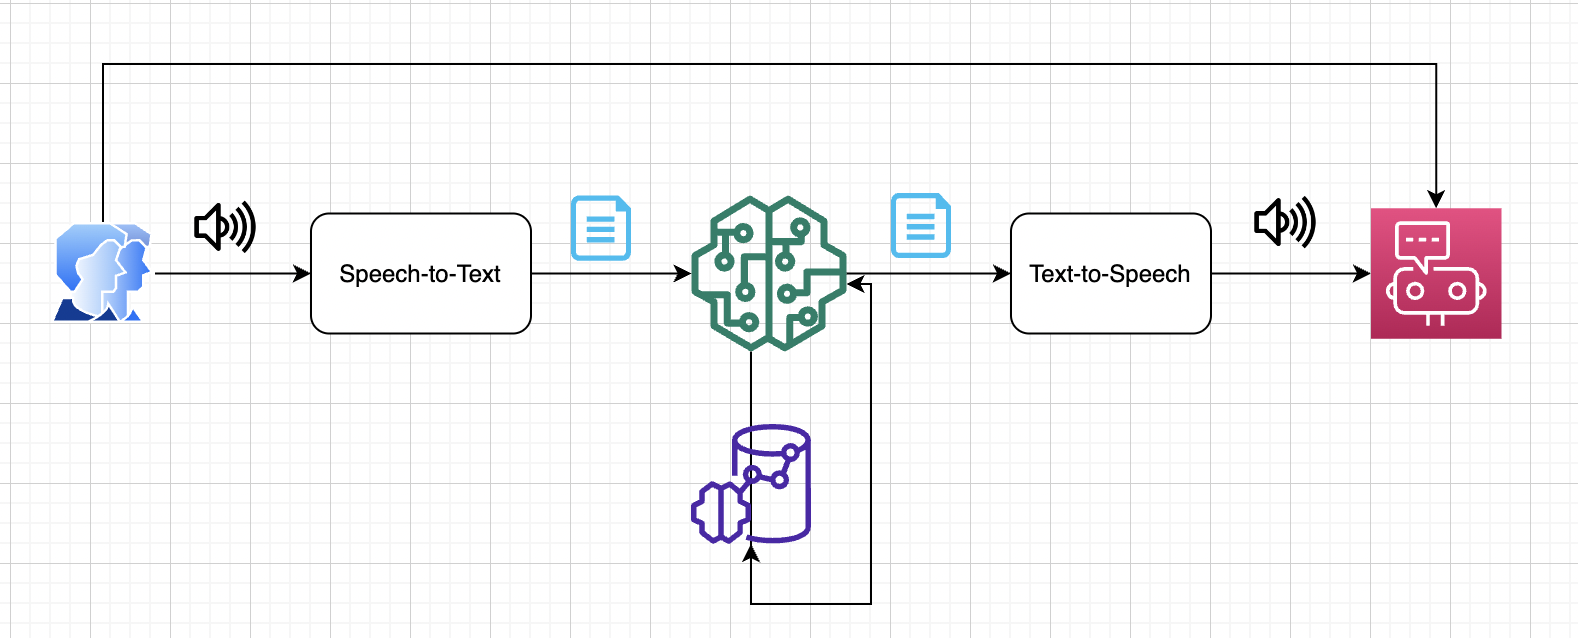


### Paso 1: Importar librería para usar los servicios cognitivos de speech to text y text to speech

In [ ]:
# ! pip install azure.cognitiveservices.speech

### Paso 2: Importar el Speech SDK de la librería que instalamos y la librería time que nos servirá más adelante

In [ ]:
import azure.cognitiveservices.speech as speechsdk
import time

### Paso 3: Definir nuestro subscription key y region

In [ ]:
subscription_key = "Your-speech-key"
service_region = "your-region"

### Paso 4: Configuracion del recognizer y el sintetizador de voz

In [ ]:
speech_config = speechsdk.SpeechConfig(subscription=subscription_key, region=service_region)

# El lenguaje que se utilizará es español
speech_config.speech_synthesis_language = "es-MX"
speech_config.speech_recognition_language = "es-MX"

### Paso 5: Crear función para convertir speech to text

In [ ]:
def speech_to_text():
    audio_config = speechsdk.AudioConfig(use_default_microphone=True)
    speech_recognizer = speechsdk.SpeechRecognizer(speech_config=speech_config, audio_config=audio_config)

    speech_recognizer.properties.set_property(speechsdk.PropertyId.SpeechServiceConnection_EndSilenceTimeoutMs, '1500')  # Adjust the value as needed (in milliseconds)

    print("Speak into your microphone.")

    def timestamped_print(message):
        print("{} - {}".format(time.strftime("%Y-%m-%d %H:%M:%S"), message))

    speech_recognizer.recognizing.connect(lambda evt: timestamped_print('RECOGNIZING: "{}"'.format(evt.result.text)))
    speech_recognizer.recognized.connect(lambda evt: timestamped_print('RECOGNIZED: "{}"'.format(evt.result.text)))
    speech_recognizer.session_started.connect(lambda evt: timestamped_print('SESSION STARTED: {}'.format(evt)))
    speech_recognizer.session_stopped.connect(lambda evt: timestamped_print('SESSION STOPPED: {}'.format(evt)))
    speech_recognizer.canceled.connect(lambda evt: timestamped_print('CANCELED: {} ({})'.format(evt.result.reason, evt.result.error_details)))

    recognized_text = None

    def on_recognized(evt):
        nonlocal recognized_text
        recognized_text = evt.result.text
        if evt.result.reason == speechsdk.ResultReason.RecognizedSpeech:
            speech_recognizer.stop_continuous_recognition()

    speech_recognizer.recognized.connect(on_recognized)

    speech_recognizer.start_continuous_recognition()
    while not recognized_text:
        time.sleep(0.5)

    return recognized_text

### Paso 5: Definir función para convertir text into speech

In [ ]:
def text_to_speech(text):
    audio_config = speechsdk.audio.AudioOutputConfig(use_default_speaker=True)
    speech_synthesizer = speechsdk.SpeechSynthesizer(speech_config=speech_config, audio_config=audio_config)

    print("Synthesizing speech...")
    result = speech_synthesizer.speak_text_async(text).get()
    if result.reason == speechsdk.ResultReason.SynthesizingAudioCompleted:
        print("Speech synthesized successfully.")
    else:
        print("Failed to synthesize speech.")


### Paso 6: Integrando nuestro modelo

In [ ]:
previous_questions = []
previous_answers = []

while True:
    print("Listening...")
    user_input = speech_to_text()
    if not user_input:
        break
    history = get_history(previous_questions, previous_answers)
    if history:
        query = refine_question(user_input, history)
        print(f'Adjusted question: {query}')
        context = get_context(vectorstore, query)
        # print(context)
        answer = ask_gpt(user_input, history, context)
        text_to_speech(answer)
    else:
        context = get_context(vectorstore, user_input)
        answer = ask_gpt(user_input, history, context)
        text_to_speech(answer)
    previous_questions.append(user_input)
    previous_answers.append(answer)